# IMDB RATING SENTIMENT ANALYSIS

# Importing the necessary libraries

In [143]:
import pandas as pd    #working with datarframes for csv files
import numpy as np     #working with numerical data
import matplotlib.pyplot as plt   #visualization
import seaborn as sns          #visualization
plt.style.use("ggplot")
import nltk                   #for NlP task
import re                   #regex for data pre-processing
from nltk.sentiment import SentimentIntensityAnalyzer   #Analyzer
#from afinn import Afinn
from nltk.corpus import stopwords 
from sklearn.model_selection import train_test_split      #scikit learn lib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

# DATA TAKEN FROM KAGGLE- 
# liNK -- https://www.kaggle.com/datasets/columbine/imdb-dataset-sentiment-analysis-in-csv-format?select=Valid.csv

In [79]:
df1 = pd.read_csv("Test.csv/Test.csv")
df2 = pd.read_csv("Train.csv/Train.csv")
df3 = pd.read_csv("Valid.csv/Valid.csv")

# ANalysing the data 

In [80]:
df1.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [81]:
df2.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [82]:
df3.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [85]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


# Visualization for better understanding

<Axes: title={'center': 'Reviews'}, xlabel='label'>

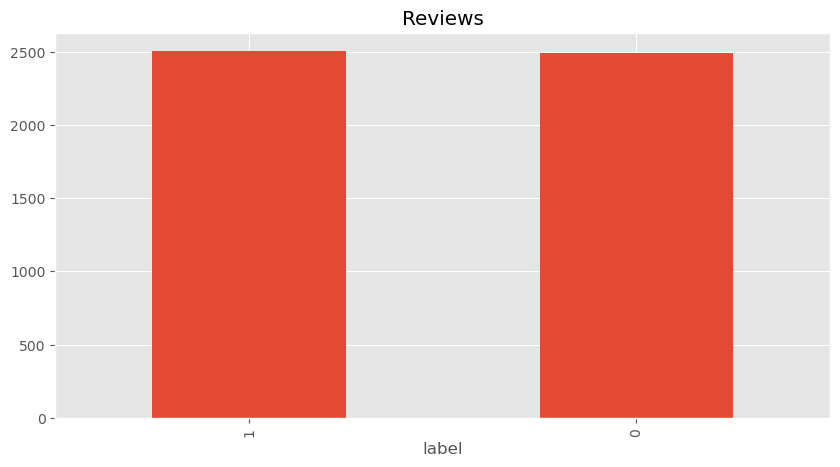

In [86]:
ax = df1["label"].value_counts().plot(kind="bar",title="Reviews",figsize=(10,5))
ax

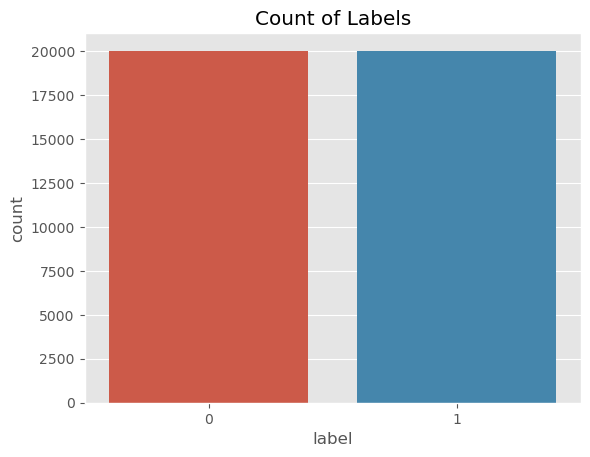

In [156]:
sns.countplot(data=df2, x='label')
plt.title('Count of Labels')
plt.show()

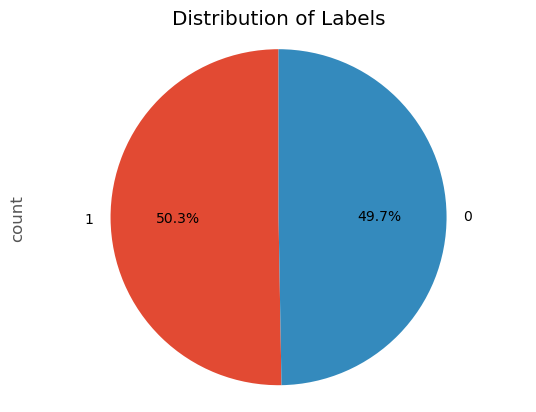

In [163]:
df3['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

# cleaning the data using regex

In [88]:
example_text = df1["text"][0]
example_text

'I always wrote this series off as being a complete stink-fest because Jim Belushi was involved in it, and heavily. But then one day a tragic happenstance occurred. After a White Sox game ended I realized that the remote was all the way on the other side of the room somehow. Now I could have just gotten up and walked across the room to get the remote, or even to the TV to turn the channel. But then why not just get up and walk across the country to watch TV in another state? "Nuts to that", I said. So I decided to just hang tight on the couch and take whatever Fate had in store for me. What Fate had in store was an episode of this show, an episode about which I remember very little except that I had once again made a very broad, general sweeping blanket judgment based on zero objective or experiential evidence with nothing whatsoever to back my opinions up with, and once again I was completely right! This show is a total crud-pie! Belushi has all the comedic delivery of a hairy lightho

In [89]:
#nltk.download('stopwords')
def cleaningdata(example_text):
    cleaned_text = re.sub(r'@\w+', '', example_text)

    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)
    words = cleaned_text.lower().split()

    stop_words = set(stopwords.words("english") + list(ENGLISH_STOP_WORDS))

    filtered_words = [word for word in words if word not in stop_words]

    cleaned_sentence = " ".join(filtered_words)
    return cleaned_sentence
#cleaningdata(example_text)
df1['text'] = df1['text'].apply(cleaningdata)

In [90]:
df1["text"][3]

'interesting thing miryang secret sunshine actors jeon doyeon lee shinae main character woman young son husband died tragic accident leaves seoul live miryang home town young son jeons face changeable girlish flirtatious elegant aged sad desperate joyous terribly isolated turns face film stars song kangho kim man meets car breaks coming miryang happens run garage town follows time despite apparent lack attentions song biggest star korea right renowned work park chanwook bong joonho sympathy mr vengeance memories murder host plays throwaway character forgotten man course makes interesting curiously appealing essential ballast jeons character floating awaybr br lee shinae piano teacher comes new town neutral place kind poormans seoul town like kim says way like little boy sprightly little boys plainly damaged withdrawn times father used snore misses lies awake pretending snore goes school shinae meets parents students shopkeepers sense place film place sense people speak local dialect kn

# tokenization

In [92]:
def tokenization(ex):
    tokens = nltk.word_tokenize(ex)
    return tokens
df1["text"] = df1["text"].apply(tokenization)

In [93]:
df1["text"]

0       [wrote, series, complete, stinkfest, jim, belu...
1       [st, watched, dirsteve, purcell, typical, mary...
2       [movie, poorly, written, directed, fell, aslee...
3       [interesting, thing, miryang, secret, sunshine...
4       [read, berlin, meer, didnt, expect, thought, r...
                              ...                        
4995    [kind, picture, john, lassiter, making, today,...
4996    [saw, whipped, press, screening, hilarious, ta...
4997    [nbc, ashamed, wouldnt, allow, children, defin...
4998    [movie, clumsy, mishmash, various, ghoststory,...
4999    [formula, movie, illegitimate, son, rich, chil...
Name: text, Length: 5000, dtype: object

# do the same with other dataset

In [95]:
df2['text'] = df2['text'].apply(cleaningdata)

In [96]:
df2["text"] = df2["text"].apply(tokenization)

In [97]:
df3['text'] = df3['text'].apply(cleaningdata)

In [98]:
df3["text"] = df3["text"].apply(tokenization)

In [99]:
df2.head()

,text,label
0,"[grew, b, watching, loving, thunderbirds, mate...",0
1,"[movie, dvd, player, sat, coke, chips, expecta...",0
2,"[people, know, particular, time, past, like, f...",0
3,"[great, biblical, movies, bored, death, minute...",0
4,"[im, die, hard, dads, army, fan, change, got, ...",1


In [100]:
df3.head()

,text,label
0,"[years, sharon, stone, awarded, viewers, legcr...",0
1,"[needed, make, car, payment, truly, awful, mak...",0
2,"[guidelines, state, comment, contain, minimum,...",0
3,"[movie, muddled, mishmash, clichs, recent, cin...",0
4,"[stan, laurel, smaller, half, alltime, greates...",0


# vectorization/feature extraction

In [102]:
train_valid_df = pd.concat([df2, df3]) #combining train and valid dataset

In [103]:
texts_train_valid = train_valid_df['text']
labels_train_valid = train_valid_df['label']

In [104]:
texts_test = df1['text']

In [105]:
labels_test = df1['label']

# Splitting data into training and test sets

In [107]:
texts_train, texts_valid, labels_train, labels_valid = train_test_split(
    texts_train_valid, labels_train_valid, test_size=0.25, random_state=42)

# Text Vectorization

In [108]:
vectorizer = CountVectorizer(ngram_range=(1, 2))

In [109]:
texts_train

24224    [story, ed, gein, interesting, interesting, mo...
38081    [story, obsessive, love, pushed, limits, lovel...
2955     [charlies, wilsons, war, demonstrates, deft, v...
30973    [knights, beginning, series, pilot, say, plot,...
1258     [handful, movies, grand, scale, difference, ar...
                               ...                        
11284    [movie, inspiring, tough, jam, financially, em...
4732     [fabulous, filmbr, br, plot, good, yarn, imagi...
38158    [east, story, documentary, musical, comedy, st...
860      [selfadmitted, boot, point, doctors, assistant...
15795    [movie, horrible, lighting, terrible, camera, ...
Name: text, Length: 33750, dtype: object

# Processing the data to convert it to strings

In [118]:
texts_train_processed = texts_train.apply(lambda x: ' '.join(map(str, x)))
texts_train_processed

24224    story ed gein interesting interesting movie in...
38081    story obsessive love pushed limits lovely swan...
2955     charlies wilsons war demonstrates deft veracit...
30973    knights beginning series pilot say plot really...
1258     handful movies grand scale difference art movi...
                               ...                        
11284    movie inspiring tough jam financially emotiona...
4732     fabulous filmbr br plot good yarn imaginativel...
38158    east story documentary musical comedy stalinis...
860      selfadmitted boot point doctors assistant refe...
15795    movie horrible lighting terrible camera moveme...
Name: text, Length: 33750, dtype: object

In [119]:
texts_valid_processed = texts_valid.apply(lambda x: ' '.join(map(str, x)))
texts_valid_processed

37979    tis farly typical tom jerry shorta situation d...
9911     stupid movie stupid plot feels like threw imag...
3386     grew movie remember brother used play backyard...
13822    secretary cheesy cliched thrillers subjected w...
4810     seeing film suggest viewer puts away expectati...
                               ...                        
26949    riding high success rebel cause came tidal wav...
18278    oh dear god horrible bad movie makes sense run...
29423    founding fathers regions monkey movie clubthis...
494      ive playing movie incessantly month love oh de...
32289    movie cause im die hard fan video game series ...
Name: text, Length: 11250, dtype: object

# fit and transform the data

In [120]:
train_vectors = vectorizer.fit_transform(texts_train_processed)

In [121]:
test_vectors = vectorizer.transform(texts_valid_processed)

# Using logistic regression

In [124]:
logistic_classifier = LogisticRegression(max_iter=1000)

In [125]:
logistic_classifier.fit(train_vectors, labels_train)

LogisticRegression(max_iter=1000)

# Predict the sentiments

In [126]:
logistic_predictions = logistic_classifier.predict(test_vectors)

In [127]:
texts_train

24224    [story, ed, gein, interesting, interesting, mo...
38081    [story, obsessive, love, pushed, limits, lovel...
2955     [charlies, wilsons, war, demonstrates, deft, v...
30973    [knights, beginning, series, pilot, say, plot,...
1258     [handful, movies, grand, scale, difference, ar...
                               ...                        
11284    [movie, inspiring, tough, jam, financially, em...
4732     [fabulous, filmbr, br, plot, good, yarn, imagi...
38158    [east, story, documentary, musical, comedy, st...
860      [selfadmitted, boot, point, doctors, assistant...
15795    [movie, horrible, lighting, terrible, camera, ...
Name: text, Length: 33750, dtype: object

# checking the accuracy

In [131]:
logistic_accuracy = accuracy_score(labels_valid, logistic_predictions)

In [132]:
logistic_accuracy

0.8932444444444444

# predicting the sentiment and adding it to test dataframe

In [133]:
def logistic_predict_sentiment(new_text):
    new_vector = vectorizer.transform([new_text])
    pred = logistic_classifier.predict(new_vector)
    return pred[0]

In [137]:
def predict_sentiments_for_dataframe(df_column):
    return df_column.apply(logistic_predict_sentiment)

In [139]:
df1['text'] = df1['text'].apply(lambda x: ' '.join(x))

In [140]:
df1['predicted_sentiment'] = predict_sentiments_for_dataframe(df1['text'])

In [146]:
sentiment_map = {0: 'negative', 1: 'positive'}

df1['predicted_sentiment_label'] = df1['predicted_sentiment'].map(sentiment_map)
print(df1[['text', 'predicted_sentiment_label']])

                                                   text  \
0     wrote series complete stinkfest jim belushi in...   
1     st watched dirsteve purcell typical mary kate ...   
2     movie poorly written directed fell asleep minu...   
3     interesting thing miryang secret sunshine acto...   
4     read berlin meer didnt expect thought right pe...   
...                                                 ...   
4995  kind picture john lassiter making today werent...   
4996  saw whipped press screening hilarious talking ...   
4997  nbc ashamed wouldnt allow children definitely ...   
4998  movie clumsy mishmash various ghoststory suspe...   
4999  formula movie illegitimate son rich chilenian ...   

     predicted_sentiment_label  
0                     negative  
1                     negative  
2                     negative  
3                     positive  
4                     negative  
...                        ...  
4995                  positive  
4996                  posit

In [154]:
df1

,text,label,predicted_sentiment,predicted_sentiment_label
0,wrote series complete stinkfest jim belushi in...,0,0,negative
1,st watched dirsteve purcell typical mary kate ...,0,0,negative
2,movie poorly written directed fell asleep minu...,0,0,negative
3,interesting thing miryang secret sunshine acto...,1,1,positive
4,read berlin meer didnt expect thought right pe...,0,0,negative
...,...,...,...,...
4995,kind picture john lassiter making today werent...,1,1,positive
4996,saw whipped press screening hilarious talking ...,1,1,positive
4997,nbc ashamed wouldnt allow children definitely ...,0,0,negative
4998,movie clumsy mishmash various ghoststory suspe...,0,0,negative


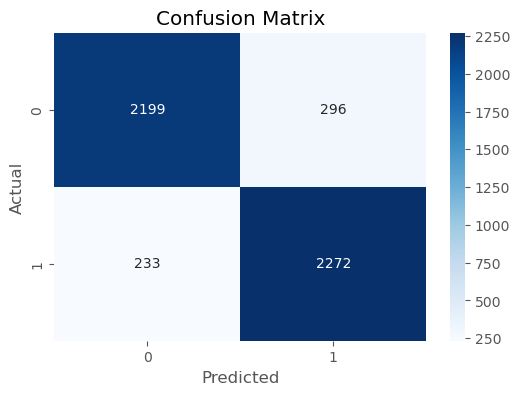

In [164]:
predicted_sentiment = df1["predicted_sentiment"]
actual_sentiment = df1["label"]  

# Compute confusion matrix
cm = confusion_matrix(actual_sentiment, predicted_sentiment)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Explaining the process in 150 words

The dataset from Kaggle was used to perform sentiment analysis on IMDB movie reviews to distinguish between positive and negative sentiment within the text. The dataset consists of three CSV files – test.cv, train.cv, and valid.cv – which were imported and converted into pandas dataframes for analysis. The analysis of the columns, rows and visualizations was done to understand the data better. To improve the quality of the data, we implemented comprehensive cleansing procedures including Regular Expression (regex) as well as the sklearn library. This included converting the text to lowercase and removing punctuation and stopwords, resulting in a clean dataset. We standardized cleaning across all three datasets to ensure consistency. Next, we tokenized, vectorized, and split the data into training data sets and test data sets. We used Logistic Regression to fit the model, resulting in an accuracy of 0,8932. Post-prediction, we added sentiments as columns to the dataset, including an analysis of a confusion matrix.